In [3]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
import glob
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/data/nevres-lane-dataset/images

/content/gdrive/MyDrive/data/nevres-lane-dataset/images


In [5]:
image_directory =  "/content/gdrive/MyDrive/data/nevres-lane-dataset/images"
mask_directory = "/content/gdrive/MyDrive/data/nevres-lane-dataset/masks"


In [6]:
SIZE = 256
num_images = 2742

In [7]:
image_names = glob.glob("/content/gdrive/MyDrive/data/nevres-lane-dataset/images/*.png")
print(image_names)

['/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1628.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1627.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1637.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1632.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1635.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1634.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1639.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1638.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1641.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1640.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1645.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1646.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1647.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1643.png', '/content/gdrive/MyDrive/data/nevres-lane-datas

In [8]:
image_names.sort()
print(image_names)

['/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/10.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/100.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1000.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1001.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1002.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1003.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1004.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1005.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1006.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1007.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1008.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/1009.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/images/101.png', '/content/gdrive/MyDrive/data/nevres-lane-dataset/imag

In [9]:
image_names_subset = image_names[0:num_images]

In [10]:
images = [cv2.imread(img, 0) for img in image_names_subset]
small_images = [cv2.resize(imgs,(256,256)) for imgs in images]

In [11]:
image_dataset = np.array(small_images)
image_dataset = np.expand_dims(image_dataset, axis = 3)

In [ ]:
mask_names = glob.glob("/content/gdrive/MyDrive/data/nevres-lane-dataset/masks/*.png")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
small_masks = [cv2.resize(mask,(256,256)) for mask in masks]
mask_dataset = np.array(small_masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def unet(input_size, loss):
  inputs = Input(input_size)
  conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
  conv1 = BatchNormalization()(conv1)
  conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
  conv1 = BatchNormalization()(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
  conv2 = BatchNormalization()(conv2)
  conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
  conv2 = BatchNormalization()(conv2)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
  conv3 = BatchNormalization()(conv3)
  conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
  conv3 = BatchNormalization()(conv3)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
  conv4 = BatchNormalization()(conv4)
  conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
  conv4 = BatchNormalization()(conv4)
  drop4 = Dropout(0.5)(conv4)
  pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

  conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
  conv5 = BatchNormalization()(conv5)
  conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
  conv5 = BatchNormalization()(conv5)
  drop5 = Dropout(0.5)(conv5)

  up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
  merge6 = concatenate([drop4,up6], axis = 3)
  conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
  conv6 = BatchNormalization()(conv6)
  conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
  conv6 = BatchNormalization()(conv6)

  up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
  merge7 = concatenate([conv3,up7], axis = 3)
  conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
  conv7 = BatchNormalization()(conv7)
  conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
  conv7 = BatchNormalization()(conv7)

  up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
  merge8 = concatenate([conv2,up8], axis = 3)
  conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
  conv8 = BatchNormalization()(conv8)
  conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
  conv8 = BatchNormalization()(conv8)

  up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
  merge9 = concatenate([conv1,up9], axis = 3)
  conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
  conv9 = BatchNormalization()(conv9)
  conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
  conv9 = BatchNormalization()(conv9)
  conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
  conv9 = BatchNormalization()(conv9)
  conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

  model = Model(inputs = inputs, outputs = conv10)
  return model

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
print(input_shape)

(256, 256, 1)


In [ ]:
model = unet(input_size, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=25, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/25
5/5 [==============================] - 28s 1s/step - loss: 0.6305 - accuracy: 0.6963 - val_loss: 1.6281 - val_accuracy: 0.1517
Epoch 2/25
5/5 [==============================] - 4s 839ms/step - loss: 0.2562 - accuracy: 0.9810 - val_loss: 2613.6348 - val_accuracy: 0.0184
Epoch 3/25
5/5 [==============================] - 4s 843ms/step - loss: 0.1566 - accuracy: 0.9874 - val_loss: 16275.9219 - val_accuracy: 0.0159
Epoch 4/25
5/5 [==============================] - 4s 850ms/step - loss: 0.1343 - accuracy: 0.9877 - val_loss: 8184.3428 - val_accuracy: 0.0235
Epoch 5/25
5/5 [==============================] - 4s 850ms/step - loss: 0.1166 - accuracy: 0.9879 - val_loss: 1596.6017 - val_accuracy: 0.0373
Epoch 6/25
5/5 [==============================] - 4s 858ms/step - loss: 0.1064 - accuracy: 0.9880 - val_loss: 980.7116 - val_accuracy: 0.0426
Epoch 7/25
5/5 [==============================] - 4s 861ms/step - loss: 0.0965 - accuracy: 0.9880 - val_loss: 245.5359 - val_accuracy: 0.0415
Epoch

In [ ]:
model.save('/content/gdrive/MyDrive/data/nevres-lane-dataset/nevres.hdf5')

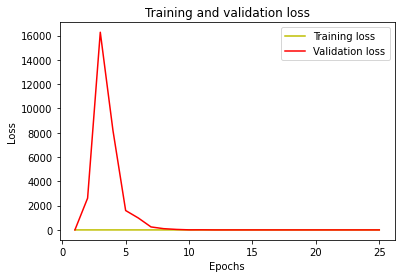

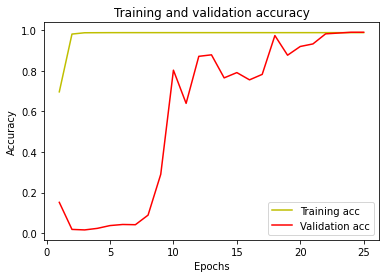

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model = load_model("/content/gdrive/MyDrive/data/nevres-lane-dataset/nevres.hdf5", compile=False)

In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

1/1 [==============================] - 6s 6s/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())
import random

Mean IoU = 0.49597436


(1, 256, 256, 1)
1/1 [==============================] - 0s 18ms/step
(256, 256)


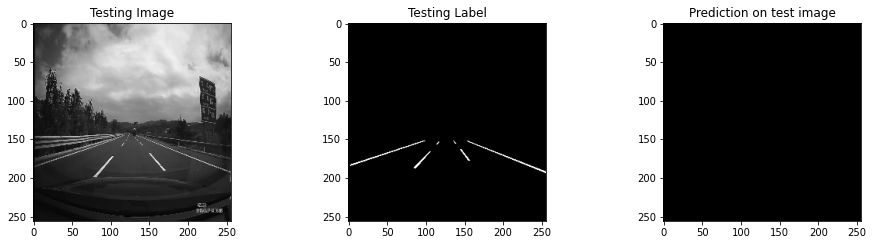

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()